## Experiment-0:  MNIST - Learn Variance

Training params:
    - Network: VAEVariance
    - Batch size: 64
    - Image type: Full image
    - Background subtraction: False
    - Background subtraction value: 0.0
    - Image-size: 28 x 28
    - Optimizer: Adam
    - Initial LR: 0.001

In [1]:
import os
os.chdir("/nfs/students/winter-term-2020/project-4/yurtkulus/project-4")

%load_ext autoreload
%autoreload 2

In [2]:
from src.data.mnist import MNISTDataModule
import torch
from src.models.vae.vae import VAE
from src.models.vae.vae_variance import VAEVariance
from src.experiments.experiment import Experiment
from src.utils.pixelcnn import generate_images
from src.utils.ood_test import plot_roc_auc

import torch.nn.functional as F
import matplotlib.pyplot as plt
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
import numpy as np

"""
    In order to obtain foreground and background images from COCO dataset, 
    uncomment the lines below.
"""
# from src.data.oodcoco.oodcoco.oodcoco import run
# run()

'\n    In order to obtain foreground and background images from COCO dataset, \n    uncomment the lines below.\n'

In [3]:
print(os.cpu_count())
torch.cuda.empty_cache()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
seed_everything(42)

20
cuda:0


42

In [4]:
mnist = MNISTDataModule(resize=True)

mnist.prepare_data()
mnist.setup()

experiment_name = 'VAEVariance_MNIST_Full_Image'

early_stop_callback = EarlyStopping(
   monitor='val_loss',
   min_delta=0.0000,
   patience=5,
   verbose=True,
)

logger = TensorBoardLogger(
            'lightning_logs', name=experiment_name)

trainer = Trainer(max_epochs=20, gpus=1, logger=logger,  
                  callbacks=[early_stop_callback], auto_lr_find=True, num_sanity_val_steps=0)


EarlyStopping mode set to min for monitoring val_loss.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [ ]:
model = VAEVariance(lr=1e-3)

trainer.fit(model, mnist)

Set SLURM handle signals.

  | Name     | Type          | Params
-------------------------------------------
0 | encoder  | ResNetEncoder | 11 M  
1 | decoder  | ResNetDecoder | 8 M   
2 | fc_mu    | Sequential    | 131 K 
3 | fc_var   | Linear        | 131 K 
4 | fc_mu_x  | Linear        | 9 M   
5 | fc_var_x | Sequential    | 9 M   


In [6]:
from pathlib import Path

path = Path('models/' + experiment_name)
# path.mkdir(parents=True, exist_ok=True)


trainer.save_checkpoint(str(path) + '/' + experiment_name + '.ckpt')

In [7]:
model_path = str(path) + '/' + experiment_name + '.ckpt'
eval_VAE_full_img = VAEVariance(lr=1e-3).load_from_checkpoint(checkpoint_path=model_path).cuda()
eval_VAE_full_img.eval()
test = mnist.test_dataloader()

background variance ====> tensor([2.8931e-05, 3.0322e-05, 2.8584e-05,  ..., 2.9797e-05, 2.8780e-05,
        3.0422e-05], device='cuda:0', grad_fn=<IndexBackward>)
foreground variance ====> tensor([3.0794e-05, 3.2711e-05, 3.5767e-05, 3.7455e-05, 4.2240e-05, 4.7840e-05,
        5.5793e-05, 3.0787e-05, 3.2056e-05, 3.2764e-05, 3.7058e-05, 3.8817e-05,
        4.5820e-05, 5.2716e-05, 5.8192e-05, 3.1005e-05, 3.2917e-05, 3.5225e-05,
        3.7013e-05, 4.2643e-05, 4.9737e-05, 5.7050e-05, 6.3305e-05, 6.9178e-05,
        7.1542e-05, 6.9635e-05, 7.1531e-05, 7.2480e-05, 7.1534e-05, 6.7625e-05,
        6.2145e-05, 5.3827e-05, 4.6276e-05, 4.2329e-05, 3.7238e-05, 3.3414e-05,
        3.4063e-05, 3.5856e-05, 4.0651e-05, 4.5470e-05, 5.3308e-05, 5.9321e-05,
        6.2596e-05, 6.4517e-05, 6.4342e-05, 6.3688e-05, 6.3592e-05, 6.6137e-05,
        6.5445e-05, 6.3688e-05, 6.0330e-05, 5.4540e-05, 4.8770e-05, 4.3115e-05,
        3.7143e-05, 3.1195e-05, 3.4238e-05, 3.9070e-05, 4.0279e-05, 4.9022e-05,
        5.4

SystemExit: 0

/nfs/students/winter-term-2020/project-4/yurtkulus/anaconda3/envs/ml-lab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


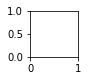

In [8]:
from src.utils.vae import generate_images
generate_images(eval_VAE_full_img, test)

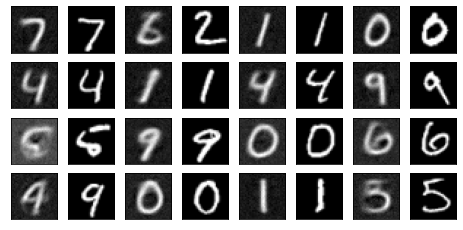

In [20]:
generate_images(eval_VAE_full_img, test)

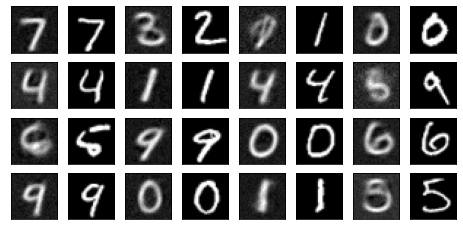

In [21]:
generate_images(eval_VAE_full_img, test)

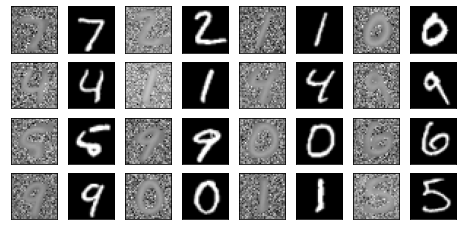

In [26]:
generate_images(eval_VAE_full_img, test)

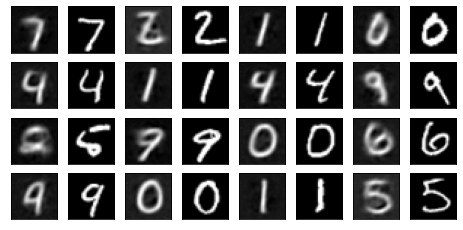

In [10]:
generate_images(eval_VAE_full_img, test)